In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor


In [3]:
##  PART 1: The goal is to predict the students' performance in two subjects; Math and Protugese 
path_in = "/data/shared/Big-Geodata-Processing-2021-1A/distributed_computing_machine_learning/Data/StudentPerformance/student-mat-simplified.csv"
mraw = np.loadtxt(path_in, 
                  dtype = np.float, 
                  delimiter = ";", 
                  skiprows = 1)

print(mraw)

[[ 1.  0. 18. ...  5.  6.  6.]
 [ 1.  0. 17. ...  5.  5.  6.]
 [ 1.  0. 15. ...  7.  8. 10.]
 ...
 [ 2.  1. 21. ... 10.  8.  7.]
 [ 2.  1. 18. ... 11. 12. 10.]
 [ 2.  1. 19. ...  8.  9.  9.]]


In [4]:
Y = mraw[:,-1]
X = mraw[:,:-2]
print(X)

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, 
                                                random_state = 42)

print(X.shape, Y.shape)
print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)

[[ 1.  0. 18. ...  3.  6.  5.]
 [ 1.  0. 17. ...  3.  4.  5.]
 [ 1.  0. 15. ...  3. 10.  7.]
 ...
 [ 2.  1. 21. ...  3.  3. 10.]
 [ 2.  1. 18. ...  5.  0. 11.]
 [ 2.  1. 19. ...  5.  5.  8.]]
(395, 31) (395,)
(276, 31) (119, 31)
(276,) (119,)


In [15]:
lm = linear_model = LinearRegression(fit_intercept = True, 
                      normalize = False, 
                      copy_X = True, 
                      n_jobs = 1)

lm.fit(xtrain, ytrain)
ypred = lm.predict(xtest)
print("LM: ", r2_score(ytest, ypred))

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)
print("DT: ", r2_score(ytest, ypred))

rf = RandomForestRegressor(n_estimators = 50, 
                           criterion = "mse", 
                           max_depth = None, 
                           max_features = "auto", 
                           bootstrap = True, 
                           min_samples_split = 2, 
                           n_jobs = 1)

rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)
r2 = round(r2_score(ytest, ypred), 2)
print("RF01: ", r2)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


LM:  0.2652750042179012
DT:  0.11460546057832444
RF01:  0.54


In [6]:
# Calculate as well for PORTUGUESE
path_in2 = "/data/shared/Big-Geodata-Processing-2021-1A/distributed_computing_machine_learning/Data/StudentPerformance/student-por-simplified.csv"

mraw2 = np.loadtxt(path_in2, dtype = np.float, 
                   delimiter = ";", 
                   skiprows = 1)



In [7]:
Y2 = mraw2[:,-1]
X2 = mraw2[:,:-2]

xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2, Y2, test_size = 0.3, 
                                                    random_state = 42)

print(X2.shape, Y2.shape)
print(xtrain2.shape, xtest2.shape)
print(ytrain2.shape, ytest2.shape)

(649, 31) (649,)
(454, 31) (195, 31)
(454,) (195,)


In [8]:
lm = LinearRegression(fit_intercept = True, 
                      normalize = False, 
                      copy_X = True, 
                      n_jobs = 1)

lm.fit(xtrain2, ytrain2)
ypred2 = lm.predict(xtest2)
print("LM: ", r2_score(ytest2, ypred2))

dt = DecisionTreeRegressor()
dt.fit(xtrain2, ytrain2)
ypred2 = dt.predict(xtest2)
print("DT: ", r2_score(ytest2, ypred2))

rf = RandomForestRegressor(n_estimators = 50, 
                           criterion = "mse", 
                           max_depth = None, 
                           max_features = "auto", 
                           bootstrap = True, 
                           min_samples_split = 2, 
                           n_jobs = 1)

rf.fit(xtrain2, ytrain2)
ypred2 = rf.predict(xtest2)
r2_b = round(r2_score(ytest2, ypred2), 2)
print("RF02: ", r2_b)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


LM:  0.6885330699467591
DT:  0.3920249425664588
RF02:  0.72


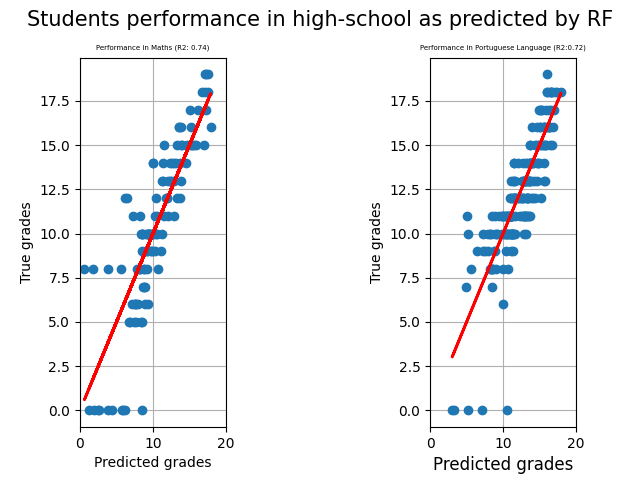

In [9]:
# PLOTTING THE PERFORMANCES FOR THE TWO SUBJECTS: MATH AND PORTUGUESE
%matplotlib widget
plt.suptitle("Students performance in high-school as predicted by RF", size = 15)

plt.subplot(1, 3, 1)
plt.title("Performance in Maths (R2: {0})".format(r2), size = 5)
plt.plot(ypred, ytest, "o")
plt.plot(ypred, ypred, "r-", linewidth = 2)
plt.xlabel("Predicted grades", size = 10)
plt.ylabel("True grades", size = 10)
plt.xlim(0, 20)
plt.grid()

plt.subplot(1, 3, 3)
plt.title("Performance in Portuguese Language (R2:{0})".format(r2_b), size = 5)
plt.plot(ypred2, ytest2, "o")
plt.plot(ypred2, ypred2, "r-", linewidth = 2)
plt.xlabel("Predicted grades", size = 12)
plt.ylabel("True grades", size = 10)
plt.xlim(0, 20)
plt.grid()

plt.show()

In [10]:
print(rf.feature_importances_)

[0.00689637 0.00551148 0.022435   0.0042866  0.00385275 0.0018538
 0.01160546 0.00972487 0.01544746 0.00926859 0.01847849 0.009087
 0.01118246 0.00789418 0.01944689 0.00306759 0.00567519 0.00085974
 0.00530059 0.00315698 0.00170357 0.00435401 0.00674564 0.01024295
 0.0153583  0.01933657 0.01031157 0.01439291 0.01186456 0.04329975
 0.68735868]


### Wine Data (Optional)

In [11]:
path_red = "/data/shared/Big-Geodata-Processing-2021-1A/distributed_computing_machine_learning/Data/WineQuality/winequality-red.csv"
path_whi = "/data/shared/Big-Geodata-Processing-2021-1A/distributed_computing_machine_learning/Data/WineQuality/winequality-white.csv"

mred = np.loadtxt(path_red, dtype=np.float, delimiter=";", skiprows=1)
mwhi = np.loadtxt(path_whi, dtype=np.float, delimiter=";", skiprows=1)

print(mred)
print(mwhi)

[[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]
[[ 7.    0.27  0.36 ...  0.45  8.8   6.  ]
 [ 6.3   0.3   0.34 ...  0.49  9.5   6.  ]
 [ 8.1   0.28  0.4  ...  0.44 10.1   6.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   7.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   6.  ]]


In [12]:
# RED WINE
Yr = mred[:,-1]
Xr = mred[:,:-1]
xtrain, xtest, ytrain, ytest = train_test_split(Xr, Yr, test_size = 0.2, 
                                                random_state = 42)

print(Xr.shape, Yr.shape)
print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)

lm = LinearRegression(fit_intercept = True, 
                      normalize = False, 
                      copy_X = True, 
                      n_jobs = 1)

lm.fit(xtrain, ytrain)
ypred = lm.predict(xtest)
print("LM: ", r2_score(ytest, ypred))

rf = RandomForestRegressor(n_estimators = 300, 
                           criterion = "mse", 
                           max_depth = None, 
                           max_features = "auto", 
                           bootstrap = True, 
                           min_samples_split = 2, 
                           n_jobs = 1)

rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)
print("RF: ", r2_score(ytest, ypred))

plt.subplot(2, 1, 1)
plt.title("RF: Red wine")
plt.plot(ypred, ytest, "o")
plt.plot(ypred, ypred, "-")

labels = ["fixed acidity", "volatile acidity", "citric acid","residual sugar", "chlorides", "free sulfur dioxide","total sulfur dioxide", "density", "ph", "sulphates", "alchool"]
zipped_rf = list (zip (labels, rf.feature_importances_))
print(zipped_rf)

(1599, 11) (1599,)
(1279, 11) (320, 11)
(1279,) (320,)
LM:  0.40318034127962155


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RF:  0.5278016706764895
[('fixed acidity', 0.05273974896561351), ('volatile acidity', 0.10739256986663599), ('citric acid', 0.04697564313641055), ('residual sugar', 0.05752485292880621), ('chlorides', 0.06729646575270923), ('free sulfur dioxide', 0.04801168827885402), ('total sulfur dioxide', 0.07820821867954389), ('density', 0.05583995672042847), ('ph', 0.059321938828105), ('sulphates', 0.1537936222098785), ('alchool', 0.2728952946330147)]


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GB:  0.40264456121987335


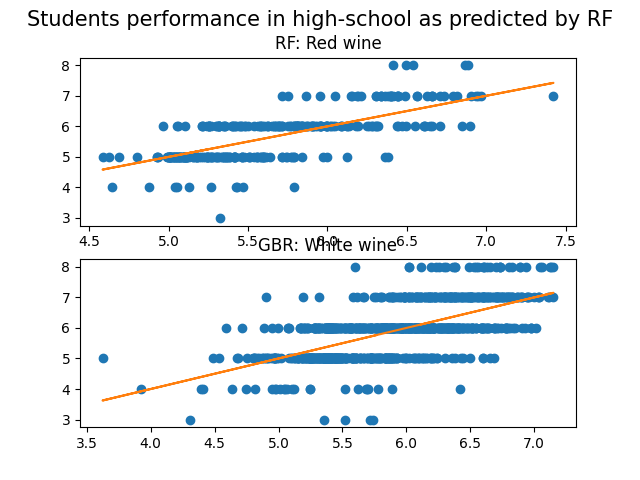

[('fixed acidity', 0.03555636952486915), ('volatile acidity', 0.17580574663722748), ('citric acid', 0.036245970540317564), ('residual sugar', 0.05186611081632668), ('chlorides', 0.033418024444251314), ('free sulfur dioxide', 0.14508062497508306), ('total sulfur dioxide', 0.028059326277848316), ('density', 0.02898975285436947), ('ph', 0.034459412906632014), ('sulphates', 0.02636555074325864), ('alchool', 0.40415311027981643)]


In [13]:
# WHITE WINE
Yw = mwhi[:,-1]
Xw = mwhi[:,:-1]

xtrain, xtest, ytrain, ytest = train_test_split(Xw, Yw, test_size = 0.2, 
                                                random_state = 42)

gb = GradientBoostingRegressor(n_estimators = 100, 
                               loss = "ls", 
                               learning_rate = 0.1, 
                               criterion = "friedman_mse")

gb.fit(xtrain, ytrain)
ypred = gb.predict(xtest)
print("GB: ", r2_score(ytest, ypred))

plt.subplot(2, 1, 2)
plt.title("GBR: White wine")
plt.plot(ypred, ytest, "o")
plt.plot(ypred, ypred, "-")
plt.show()

labels = ["fixed acidity", "volatile acidity", "citric acid","residual sugar", "chlorides", "free sulfur dioxide","total sulfur dioxide", "density", "ph", "sulphates", "alchool"]
zipped_gb = list (zip (labels, gb.feature_importances_))
print(zipped_gb)